In [1]:
library(tidyverse)
library(readxl)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
dieback = read_excel("input/Euc Dieback and Melaleuca metadata with indices_updated20230830.xlsx", na="NA") %>%
    janitor::clean_names() %>%
    filter(!if_all(everything(), is.na))

New names:
• `` -> `...5`
• `` -> `...7`
• `` -> `...8`
• `` -> `...10`
• `` -> `...11`
• `` -> `...13`
• `` -> `...14`
• `` -> `...16`
• `` -> `...28`


In [3]:
str(dieback)

tibble [1,924 × 28] (S3: tbl_df/tbl/data.frame)
 $ sample_no               : chr [1:1924] "NCT" "MON0000" "MON0001" "MON0002" ...
 $ plate                   : chr [1:1924] "MN01" "MN01" "MN01" "MN01" ...
 $ well_number             : chr [1:1924] "A01" "B1" "C1" "D1" ...
 $ nextera_indices_layout  : chr [1:1924] "Layout 5" "Layout 5" "Layout 5" "Layout 5" ...
 $ x5                      : chr [1:1924] "B-0086" "B-0086" "B-0086" "B-0086" ...
 $ reverse_comp_for_novaseq: chr [1:1924] "WGS_I7_2" "WGS_I7_2" "WGS_I7_2" "WGS_I7_2" ...
 $ x7                      : chr [1:1924] "AACCAGGT" "AACCAGGT" "AACCAGGT" "AACCAGGT" ...
 $ x8                      : chr [1:1924] "B-0078" "B-0079" "B-0080" "B-0081" ...
 $ forward_for_novaseq     : chr [1:1924] "WGS_I5_71" "WGS_I5_248" "WGS_I5_312" "WGS_I5_381" ...
 $ x10                     : chr [1:1924] "ATCTTGGT" "CTTCCTTG" "GCTGGCGG" "ACGTTACG" ...
 $ x11                     : chr [1:1924] "B-0086" "B-0086" "B-0086" "B-0086" ...
 $ reverse_comp_for_miseq 

In [4]:
dieback_pre = dieback %>%
    transmute(
        library=sample_no,
        sample = sample_no,
        meta_source="dieback",
        plate,
        project=case_when(
            grepl("^MN", plate) ~ "MMackinnon",
            T ~ "MyrtleRust"
        ),
        well=well_number,
        i7 = reverse_comp_for_novaseq,
        i7_seq=x7,
        i5 = forward_for_novaseq,
        i5_seq=x10,
        latitude,
        longitude,
        elevation,
        species,
        date=as.Date(date, origin="1899-12-30"),
        time,
        notes=note,
        percent_dieback,
        seed,
        seed_amount,
    )

In [5]:
str(dieback_pre)

tibble [1,924 × 20] (S3: tbl_df/tbl/data.frame)
 $ library        : chr [1:1924] "NCT" "MON0000" "MON0001" "MON0002" ...
 $ sample         : chr [1:1924] "NCT" "MON0000" "MON0001" "MON0002" ...
 $ meta_source    : chr [1:1924] "dieback" "dieback" "dieback" "dieback" ...
 $ plate          : chr [1:1924] "MN01" "MN01" "MN01" "MN01" ...
 $ project        : chr [1:1924] "MMackinnon" "MMackinnon" "MMackinnon" "MMackinnon" ...
 $ well           : chr [1:1924] "A01" "B1" "C1" "D1" ...
 $ i7             : chr [1:1924] "WGS_I7_2" "WGS_I7_2" "WGS_I7_2" "WGS_I7_2" ...
 $ i7_seq         : chr [1:1924] "AACCAGGT" "AACCAGGT" "AACCAGGT" "AACCAGGT" ...
 $ i5             : chr [1:1924] "WGS_I5_71" "WGS_I5_248" "WGS_I5_312" "WGS_I5_381" ...
 $ i5_seq         : chr [1:1924] "ATCTTGGT" "CTTCCTTG" "GCTGGCGG" "ACGTTACG" ...
 $ latitude       : num [1:1924] NA -37.1 -37.1 -37.1 -37.1 ...
 $ longitude      : num [1:1924] NA 149 149 149 149 ...
 $ elevation      : num [1:1924] NA 0 0 0 0 NA 0 0 0 0 ...
 $ spec

In [6]:
dp15_seq = read_tsv("input/runlib2sample.tsv") %>%
    rename(seq_date=date)

Rows: 2920 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): run, library, sample, include, project, date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
dp15_meta = read_tsv("input/sample-metadata.tsv") %>%
    unique()

Rows: 1746 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (10): sample, species, date, datum, location, collectors, samplename, p...
dbl   (3): latitude, longitude, elevation
dttm  (1): parsed_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


This is needed as we have a few duplicates for the CCAs. The below horrible filter statement picks the most data complete ones (remove it to see)

In [8]:
dp15_meta_pre = dp15_meta %>%
    group_by(sample) %>%
    mutate(n=n()) %>%
    ungroup() %>%
    arrange(sample)  %>%
    filter(n==1 | (n != 1  & is.na(samplename))) %>%
    mutate(
        meta_source="dp15",
    )

In [9]:
dp15_pre = full_join(dp15_seq, dp15_meta_pre, by="sample") %>%
    mutate(date=lubridate::ymd(sub(" .+", "", parsed_date)))

In [10]:
dp15_pre %>%
    filter(is.na(n))

run,library,sample,include,project,seq_date,species,date,parsed_date,latitude,⋯,elevation,datum,location,collectors,samplename,population,seed,notes,n,meta_source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dttm>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
2020_Borevitz_UWA_S4,A_acuminata_ANBG_1,Acacia_acuminata_ANBG,Y,AcaciaPan,2020-01,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020_Borevitz_UWA_S4,A_acuminata_ANBG_2,Acacia_acuminata_ANBG,Y,AcaciaPan,2020-01,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020_Borevitz_UWA_S4,A_dealbata_1,Acacia_dealbata,Y,AcaciaPan,2020-01,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020_Borevitz_UWA_S4,A_dealbata_2,Acacia_dealbata,Y,AcaciaPan,2020-01,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020_Borevitz_UWA_S4,A_melanoxylon_1,Acacia_melanoxylon,Y,AcaciaPan,2020-01,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020_Borevitz_UWA_S4,A_melanoxylon_2,Acacia_melanoxylon,Y,AcaciaPan,2020-01,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021_Bothwell_novogene_S4,NCT,NCT,N,HBDecra,2021-03,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021_Bothwell_novogene_S4,NCT_1,NCT_1,N,HBDecra,2021-03,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021_Bothwell_novogene_S4,NCT_3,NCT_3,N,HBDecra,2021-03,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [11]:
str(dp15_pre)

tibble [3,220 × 21] (S3: tbl_df/tbl/data.frame)
 $ run        : chr [1:3220] "2020_Borevitz_UWA_S4" "2020_Borevitz_UWA_S4" "2020_Borevitz_UWA_S4" "2020_Borevitz_UWA_S4" ...
 $ library    : chr [1:3220] "A_acuminata_ANBG_1" "A_acuminata_ANBG_2" "A_dealbata_1" "A_dealbata_2" ...
 $ sample     : chr [1:3220] "Acacia_acuminata_ANBG" "Acacia_acuminata_ANBG" "Acacia_dealbata" "Acacia_dealbata" ...
 $ include    : chr [1:3220] "Y" "Y" "Y" "Y" ...
 $ project    : chr [1:3220] "AcaciaPan" "AcaciaPan" "AcaciaPan" "AcaciaPan" ...
 $ seq_date   : chr [1:3220] "2020-01" "2020-01" "2020-01" "2020-01" ...
 $ species    : chr [1:3220] NA NA NA NA ...
 $ date       : Date[1:3220], format: NA NA ...
 $ parsed_date: POSIXct[1:3220], format: NA NA ...
 $ latitude   : num [1:3220] NA NA NA NA NA ...
 $ longitude  : num [1:3220] NA NA NA NA NA ...
 $ elevation  : num [1:3220] NA NA NA NA NA NA 153 253 259 279 ...
 $ datum      : chr [1:3220] NA NA NA NA ...
 $ location   : chr [1:3220] NA NA NA NA ...
 $ co

In [12]:
neweng = read_csv("input/Maid_meta_bio_tags.csv") %>%
    janitor::clean_names()

New names:
• `` -> `...1`
Rows: 206 Columns: 60
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (30): species_group, sample, species.x, NoOut, Section_Vlook, Section_ed...
dbl (28): ...1, latitude, longitude, jit_latitude, jit_longitude, elevation....
lgl  (2): population, seed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
neweng = neweng %>%
    filter(is.na(no_out)) %>%
    transmute(
        library=sample,  sample, species=species_x, latitude, longitude, location, notes, date=lubridate::as_date(lubridate::dmy_hm(parsed_date)),
        meta_source="neweng", 
    )
str(neweng)

tibble [189 × 9] (S3: tbl_df/tbl/data.frame)
 $ library    : chr [1:189] "DDA123e" "DDA123j" "DDA129" "DDA123b" ...
 $ sample     : chr [1:189] "DDA123e" "DDA123j" "DDA129" "DDA123b" ...
 $ species    : chr [1:189] "Eucalyptus canobolensis" "Eucalyptus canobolensis" "Eucalyptus canobolensis" "Eucalyptus canobolensis" ...
 $ latitude   : num [1:189] -33.4 -33.4 -33.3 -33.4 -33.4 ...
 $ longitude  : num [1:189] 149 149 149 149 149 ...
 $ location   : chr [1:189] "c. 350m west from Mt Towac track, Mt Canobolas." "c. 350m west from Mt Towac track, Mt Canobolas." "Junction of Fern gully road, Devils hole fire trail and Summit road. Mt Canobolas." "c. 350m west from Mt Towac track, Mt Canobolas." ...
 $ notes      : chr [1:189] NA NA NA NA ...
 $ date       : Date[1:189], format: "2019-11-03" "2019-11-03" ...
 $ meta_source: chr [1:189] "neweng" "neweng" "neweng" "neweng" ...


In [14]:
cca_all = read_excel("input/CCATreesCombinedMetadata_ash.xlsx", na = "NA", guess_max = 100000) %>%
    janitor::clean_names()

In [15]:
str(cca_all)

tibble [6,098 × 24] (S3: tbl_df/tbl/data.frame)
 $ field_id           : chr [1:6098] "CCA0001" "CCA0002" "CCA0003" "CCA0004" ...
 $ row_tree           : chr [1:6098] "R009/T03" "R009/T04" "R009/T05" "R009/T09" ...
 $ current_name       : chr [1:6098] "Eucalyptus leptopoda subsp. elevata" "Eucalyptus leptopoda subsp. elevata" "Eucalyptus mannensis subsp. mannensis" "Eucalyptus gamophylla" ...
 $ voucher            : chr [1:6098] "DN 8" "DN 8" "-" "-" ...
 $ provenance         : chr [1:6098] "Ilkurlka, WA" "Ilkurlka, WA" "Giles, WA" "Kings Canyon, NT" ...
 $ row_num            : num [1:6098] 9 9 9 9 9 9 9 9 9 9 ...
 $ year_planted       : num [1:6098] 1993 1993 1993 1993 1993 ...
 $ tree_num           : num [1:6098] 3 4 5 9 14 15 16 17 18 19 ...
 $ dn_number          : num [1:6098] 8 8 NA NA NA NA NA NA NA NA ...
 $ field_comments     : chr [1:6098] NA NA NA NA ...
 $ date               : POSIXct[1:6098], format: NA NA ...
 $ field_determination: chr [1:6098] "Eucalyptus leptopoda subsp.

In [16]:
cca_pre = cca_all %>%
    transmute(
        sample=field_id,
        species=current_name,
        location,
        latitude,
        longitude, 
        date = as.Date(date),
        notes = field_comments,
        meta_source="cca",
        
    )

In [17]:
all_eucs =  bind_rows(dp15_pre, dieback_pre, neweng) %>%
    mutate_if(is.character, utf8::utf8_encode) %>%
    mutate(
        library=case_when(
            is.na(library) ~ sample,
            T ~ library,
        ), 
        sample=case_when(
            is.na(sample) ~ library,
            T ~ sample,
        ), 
        parsed_date = case_when(
            !is.na(as.numeric(date)) ~ as.Date(as.numeric(date), origin = "1899-12-30"),
            grepl("\\d{2}-(JAN|FEB|MAR|APR|MAY|JUN|JUL|AUG|SEP|OCT|NOV|DEC)-\\d+", date, perl=T) ~ lubridate::dmy(sub(" .+", "", date)),
            grepl("T.+Z", date) ~ lubridate::ymd(sub("T.+Z", "", date)),
            grepl("\\d+/\\d+/\\d{4}", date) ~ lubridate::dmy(date),
            
        ),
        latitude=ifelse(latitude==0, NA, latitude),
        longitude=ifelse(longitude==0, NA, longitude),
        species=ifelse(species=="0", NA, species),
        species=sub("E. ", "Eucalyptus ", species, fixed=T),
        errors = "",
        errors = case_when(
            (is.na(latitude) & is.na(longitude)) | (latitude > -44 & latitude < -10 & longitude > 110 & longitude < 155) ~ errors,
            T ~ paste0(errors, "latlong;")
        ),
    )

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `parsed_date = case_when(...)`.
Caused by warning:
! All formats failed to parse. No formats found.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


In [18]:
#write_tsv(all_eucs, "all_merged_euc_metadata.tsv", na="")

# Plots

Warning message in geom_map(aes(long, lat, group = group, map_id = region), data = aus, :
“Ignoring unknown aesthetics: x and y”
Warning message:
“Removed 1079 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1079 rows containing missing values (`geom_point()`).”


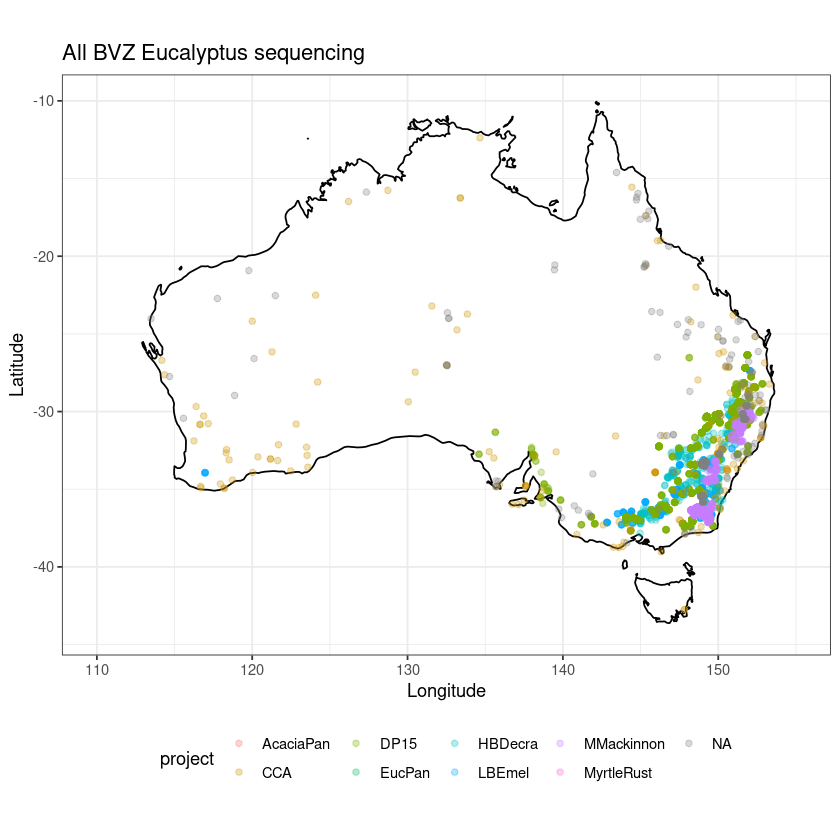

In [19]:
aus = map_data("world", "Australia")
all_eucs %>%
    rename(lat=latitude, long=longitude) %>%
ggplot(aes(long, lat)) +
    geom_map(aes(long, lat, group=group, map_id=region), data=aus, map=aus, colour="black", fill="white") + 
    geom_point(aes(colour=project), alpha=0.3) +
    xlim(c(110, 155)) +
    ylim(c(-44, -10)) +
    labs(title="All BVZ Eucalyptus sequencing", x="Longitude", y="Latitude") + 
    coord_fixed() +
    theme_bw() +
    theme(legend.position="bottom")
#ggsave("map.svg", width=8, height=8)
ggsave("map.png", width=8, height=8, dpi=600)

# mapping to fastq

In [20]:
fqs = readLines(xzfile("input/allfq.txt.xz"))
fqs = tibble(file=fqs) %>%
    filter(
        !grepl("/g/data/xe2/datasets/(NORMAN_WARTHMANN|ash_gap|iwyp60|uploads_public|gbs|dataupload)/", file),
    )
#kview(fqs)

In [21]:
grp1 = fqs %>%
    extract(file, into=c("seqproject", "lanedir", "library", "sid", "lane", "read"), remove=F,
            regex = "/g/data/xe2/datasets/([^/]+)(.*/)([^/]+)_(S\\d+)_(L\\d+_)?(R?[12])?_?[^/]*\\.gz") %>%
    filter(!is.na(seqproject)) %>%
    mutate(
        read = case_match(read,
                          "" ~ "interleaved",
                          "R1" ~ "read1",
                          "R2" ~ "read2",
                          ),
    )

In [22]:
grp2 = fqs %>%
    extract(file, into=c("seqproject", "lanedir", "library",  "lane", "read"), remove=F, 
            regex = "/g/data/xe2/datasets/(2021_S4_Bothwell)/([^/]+).+/([^/]+)_DKDL.+_(L1)_([12]).fq.gz") %>%
    filter(!is.na(seqproject)) %>%
    mutate(
        read = case_match(read,
                          "" ~ "interleaved",
                          "1" ~ "read1",
                          "2" ~ "read2",
                          ),
    )

In [23]:
grp3 = fqs %>%
    extract(file, into=c("seqproject", "lanedir", "library",  "read"), remove=F, 
            regex = "/g/data/xe2/datasets/(rose-andrew)/rawdata/runs/([^/]+)/([^/]+)_(R[12]).fastq.gz") %>%
    filter(!is.na(seqproject)) %>%
    mutate(
        read = case_match(read,
                          "R1" ~ "read1",
                          "R2" ~ "read2",
                          ),
    )

In [24]:
grp4 = fqs %>%
    extract(file, into=c("seqproject", "library"), remove=F, 
            regex = "/g/data/xe2/datasets/(BGI-eucseq)/pooled/([^/]+).fastq.gz") %>%
    filter(!is.na(seqproject)) %>%
    mutate(
        read = "interleaved",
    )

In [25]:
fqs =  bind_rows(grp1, grp2, grp3, grp4) %>% 
    mutate(lanedir=paste0(gsub("/", "", lanedir), "_", sub("_", "", lane)) %>% gsub("^NA_|_NA$", "", .))
#write_tsv(fqs, "fastq_files.tsv", na="")
fqw = fqs %>%
    pivot_wider(names_from="read", values_from="file") %>%
    select(-sid, -lane)

In [30]:
all_wide = all_eucs %>%
    select(-run, -include, -errors) %>%
    distinct() %>% 
    full_join(., fqw, by="library") %>%
    filter(
        !(lanedir == "2019-09-24_ahrens-rymer-marri-nextseq-test-flowcell_" & is.na(read1) & is.na(read2) & !is.na(interleaved)),  # these correspond to merged files
    ) %>%
    mutate(
        project=case_when(
            !is.na(project) ~ project,
            grepl("^CCA", sample) ~ "CCA",
            grepl("^JJB|DDA", sample) ~ "NEng",
        )
    )

Warning message in full_join(., fqw, by = "library"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 7 of `x` matches multiple rows in `y`.
ℹ Row 4757 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”


In [31]:
write_tsv(all_wide, "alleuc_all_metadata.tsv", na="")

In [32]:
all_wide %>%
    select(library, sample, project, seq_date, plate, well, i7, i5, i7_seq, i5_seq, seqproject, lanedir, read1, read2, interleaved) %>%
    unique() %>%
    write_tsv("alleuc_fastq_to_sample.tsv", na="")

In [33]:
all_wide %>%
    select(sample, project, species, date, latitude, longitude, elevation, datum, location, collectors, population, seed, notes, percent_dieback, seed_amount) %>%
    unique() %>%
    write_tsv("alleuc_sample_metadata.tsv", na="")